In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/kaggle/input/reddit-data/reddit_cleaned_v2.csv')
df["created_utc_date"] = pd.to_datetime(df["created_utc"], unit="s")

df.head()

,title,selftext,url,url_overridden_by_dest,permalink,domain,subreddit,subreddit_name_prefixed,subreddit_subscribers,score,...,id,stickied,author,is_gallery,created_utc_date,clean_title,clean_selftext,hashtags,keywords_title,keywords_selftext
0,What Are You Reading/Book Club Tuesday,"What you are reading, watching, or listening ...",https://www.reddit.com/r/Anarchism/comments/1i...,NaN,/r/Anarchism/comments/1is5wgo/what_are_you_rea...,self.Anarchism,Anarchism,r/Anarchism,275979,2,...,1is5wgo,True,AutoModerator,NaN,2025-02-18 06:01:00,reading book club tuesday,reading watching listening far gotten chosen...,NaN,"[('club', 0.5552), ('reading', 0.5469), ('book...","[('reading', 0.525), ('listening', 0.5213), ('..."
1,"""WTF is Social Ecology?"" by Usufruct Collective",NaN,https://usufructcollective.wordpress.com/2025/...,https://usufructcollective.wordpress.com/2025/...,/r/Anarchism/comments/1irrceg/wtf_is_social_ec...,usufructcollective.wordpress.com,Anarchism,r/Anarchism,275979,48,...,1irrceg,False,NewMunicipalAgenda,NaN,2025-02-17 18:47:05,wtf social ecology usufruct collective,NaN,NaN,"[('collective', 0.677), ('social', 0.5619), ('...",[]
2,Who do you think is the most powerful/popular ...,I am an anarcho-nihilist and i am reading simi...,https://www.reddit.com/r/Anarchism/comments/1i...,NaN,/r/Anarchism/comments/1ir8tnp/who_do_you_think...,self.Anarchism,Anarchism,r/Anarchism,275979,3,...,1ir8tnp,False,Charming-Score7015,NaN,2025-02-17 01:57:39,think powerful popular anarch-nihilist,anarcho-nihilist reading similar type books lo...,NaN,"[('anarch', 0.68), ('nihilist', 0.679), ('powe...","[('nihilist', 0.5281), ('anarcho', 0.524), ('b..."
3,Not paying student loans or taxes,"Ayo, im an anarchist but perhaps not the most ...",https://www.reddit.com/r/Anarchism/comments/1i...,NaN,/r/Anarchism/comments/1irq9vp/not_paying_stude...,self.Anarchism,Anarchism,r/Anarchism,275979,33,...,1irq9vp,False,NoBackground7266,NaN,2025-02-17 18:05:32,paying student loans taxes,ayo m anarchist read working \n\n live abroad ...,NaN,"[('loans', 0.5168), ('taxes', 0.454), ('studen...","[('anarchist', 0.6269), ('protest', 0.4266), (..."
4,Recommendations for intellectual debate content,Looking for videos/podcasts/writing where folk...,https://www.reddit.com/r/Anarchism/comments/1i...,NaN,/r/Anarchism/comments/1irojku/recommendations_...,self.Anarchism,Anarchism,r/Anarchism,275979,7,...,1irojku,False,Jewstun,NaN,2025-02-17 16:57:44,recommendations intellectual debate content,looking videos podcasts writing folks anarchis...,NaN,"[('debate', 0.526), ('recommendations', 0.4735...","[('podcasts', 0.5399), ('debates', 0.4745), ('..."


In [45]:
print(df.columns.to_list())

['title', 'selftext', 'url', 'url_overridden_by_dest', 'permalink', 'domain', 'subreddit', 'subreddit_name_prefixed', 'subreddit_subscribers', 'score', 'upvote_ratio', 'num_comments', 'num_crossposts', 'total_awards_received', 'created_utc', 'crosspost_parent_list', 'crosspost_parent', 'link_flair_text', 'post_hint', 'is_video', 'over_18', 'id', 'stickied', 'author', 'is_gallery', 'created_utc_date', 'clean_title', 'clean_selftext', 'hashtags', 'keywords_title', 'keywords_selftext']


In [46]:
df["crosspost_parent"]

0              NaN
1       t3_1irrbvc
2              NaN
3              NaN
4              NaN
           ...    
8794           NaN
8795           NaN
8796           NaN
8797           NaN
8798           NaN
Name: crosspost_parent, Length: 8799, dtype: object

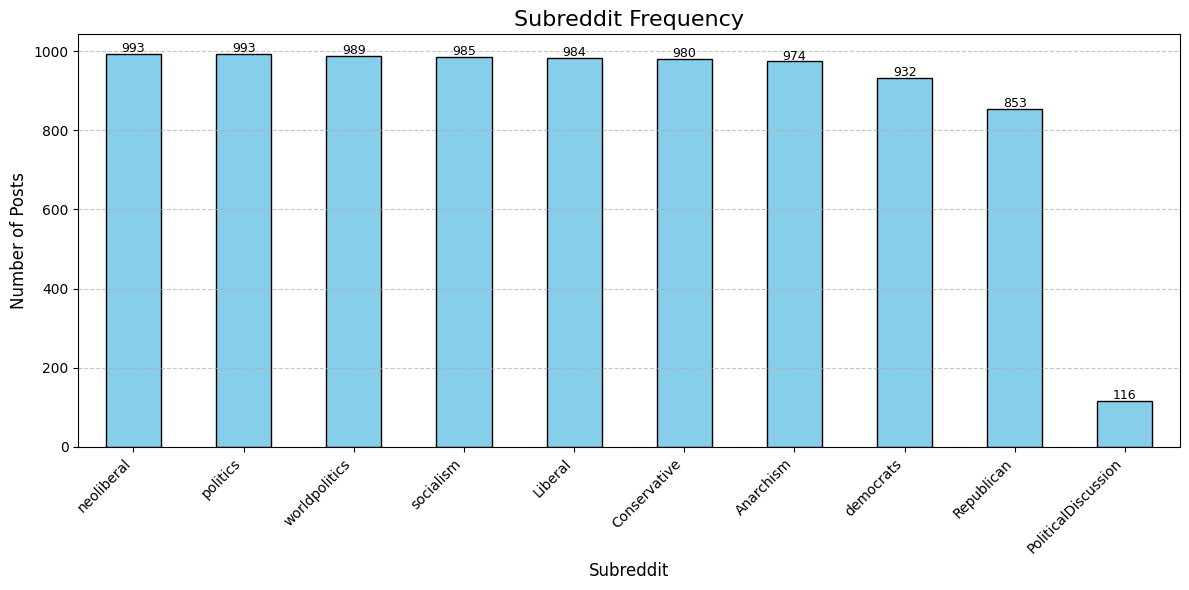

In [47]:
import matplotlib.pyplot as plt

subreddit_counts = df['subreddit'].value_counts()

plt.figure(figsize=(12, 6))
subreddit_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Subreddit Frequency', fontsize=16)
plt.xlabel('Subreddit', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optional: Add value labels on bars
for i, v in enumerate(subreddit_counts):
    plt.text(i, v + 5, str(v), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

In [48]:
 df['subreddit'].value_counts().reset_index().columns

Index(['subreddit', 'count'], dtype='object')

In [49]:
import plotly.express as px
subreddit_counts = df['subreddit'].value_counts().reset_index()
subreddit_counts.columns = ['Subreddit', 'Post Count']

fig = px.treemap(
    subreddit_counts,
    path=['Subreddit'],
    values='Post Count',
    color='Post Count',
    color_continuous_scale='blues',
    title='Subreddit Post Distribution'
)

# Customize hover and labels
fig.update_traces(
    textinfo="label+value+percent parent",
    hovertemplate="<b>%{label}</b><br>Posts: %{value}<br>%{percentParent:.1%} of Total<extra></extra>",
    marker=dict(line=dict(color='black', width=0.5))
    )
    
fig.update_layout(margin=dict(t=50, l=0, r=0, b=0))
fig.show(renderer='iframe')

In [50]:
import plotly.express as px
import pandas as pd


# Prepare data
subreddit_counts = df['subreddit'].value_counts().reset_index()
subreddit_counts.columns = ['Subreddit', 'count']
subreddit_counts['Subreddit'] = subreddit_counts['Subreddit'].str.title()

# Create initial treemap using a continuous color scale (creates a coloraxis)
fig = px.treemap(
    subreddit_counts,
    path=['Subreddit'],
    values='count',
    color='count',
    color_continuous_scale='Viridis',
    template="plotly_dark"
)

# Remove numbers from inside the blocks and customize the hover info
fig.update_traces(
    textinfo='label',
    textfont=dict(family="Arial Black", color="Black", size=16),  # Bold & large text
    hovertemplate="<b>%{label}</b><br>Posts: %{value}<br>%{percentParent:.1%} of Total<extra></extra>",
    marker=dict(line=dict(color='black', width=0.5))
)

# Add dropdown to update the color scale via the coloraxis
fig.update_layout(
    updatemenus=[
        {
            "buttons": [
                {
                    "label": "Viridis",
                    "method": "relayout",
                    "args": [{"coloraxis.colorscale": "Viridis"}]
                },
                {
                    "label": "Rainbow",
                    "method": "relayout",
                    "args": [{"coloraxis.colorscale": "Rainbow"}]
                },
                {
                    "label": "Plasma",
                    "method": "relayout",
                    "args": [{"coloraxis.colorscale": "Plasma"}]
                },
                {
                    "label": "Earth",
                    "method": "relayout",
                    "args": [{"coloraxis.colorscale": "Earth"}]
                },
                {
                    "label": "Blues",
                    "method": "relayout",
                    "args": [{"coloraxis.colorscale":"Blues"}]
                }
            ],
            "direction": "down",
            "showactive": True,
            "x": -0.08,  # Move to the left
            "xanchor": "left",
            "y": 0.5,  # Move to the bottom
            "yanchor": "middle",
            "bgcolor": "black",  # Keep dark theme
            "bordercolor": "white",
            "font": {"color": "white"}  # Ensure text is visible
        }
    ],
    margin=dict(t=50, l=100, r=0, b=50)
)

# Adjust title position
# fig.update_layout(
#     title=dict(
#         x=0.25,
#         xanchor="left",
#         y=0.95,
#         yanchor="top"
#     )
# )

# For Kaggle, using renderer='iframe'
fig.show(renderer="iframe")

import json

# Save plot as JSON
postfreq_distribution_fig = fig.to_json()
with open("postfreq_distribution_fig.json", "w") as f:
    f.write(postfreq_distribution_fig)

In [51]:
fig.write_html("subreddit_posts.html")

In [52]:
import plotly.express as px

# Get counts and reset index
subreddit_counts = df['subreddit'].value_counts().reset_index()
subreddit_counts.columns = ['Subreddit', 'Post Count']

# Create interactive bar plot
fig = px.bar(
    subreddit_counts,
    x='Post Count',
    y='Subreddit',
    orientation='h',
    color='Post Count',
    color_continuous_scale='Bluered',
    title='Post Frequency by Subreddit',
    text_auto=True,
    height=500
)

# Customize
fig.update_layout(
    yaxis={'categoryorder': 'total ascending'},
    hoverlabel=dict(bgcolor="white", font_size=12),
    xaxis_title="Number of Posts",
    yaxis_title="",
    coloraxis_showscale=False
)

# Add interactive features
fig.update_traces(
    hovertemplate="<b>%{y}</b><br>Posts: %{x}<extra></extra>",
    textposition='outside'
)

# Add scrollbar if needed
fig.update_layout(yaxis=dict(fixedrange=True))

fig.show()

In [53]:
df['subreddit'].value_counts()

subreddit
neoliberal             993
politics               993
worldpolitics          989
socialism              985
Liberal                984
Conservative           980
Anarchism              974
democrats              932
Republican             853
PoliticalDiscussion    116
Name: count, dtype: int64

Anarchism


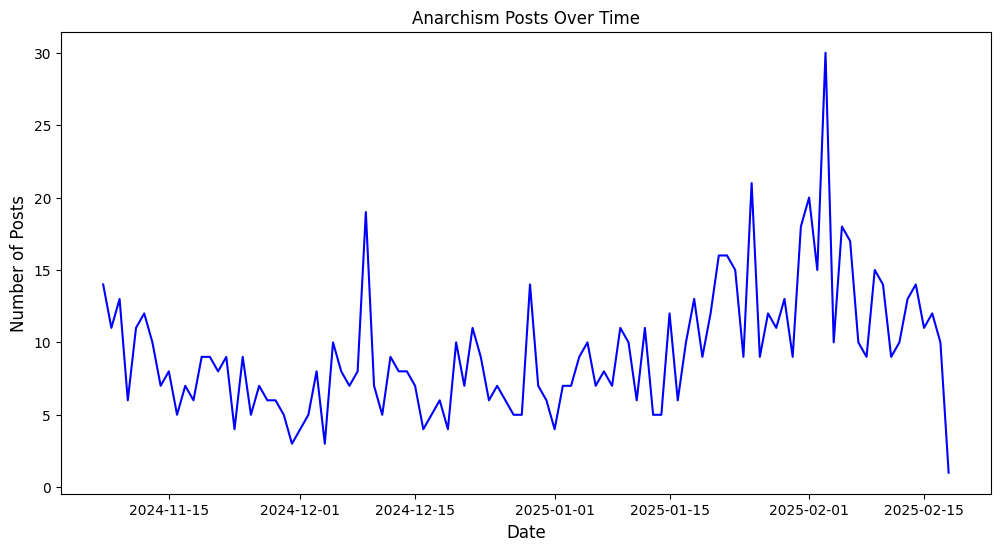

In [54]:
subreddits = df['subreddit'].unique()

for subreddit in subreddits:
    print(subreddit)
    res = df.query(f'subreddit == "{subreddit}"').groupby(df['created_utc_date'].dt.date).size()
    res.plot(kind='line', figsize=(12, 6), title=f'{subreddit} Posts Over Time', color='blue', marker='')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Number of Posts', fontsize=12)
    plt.show()
    break

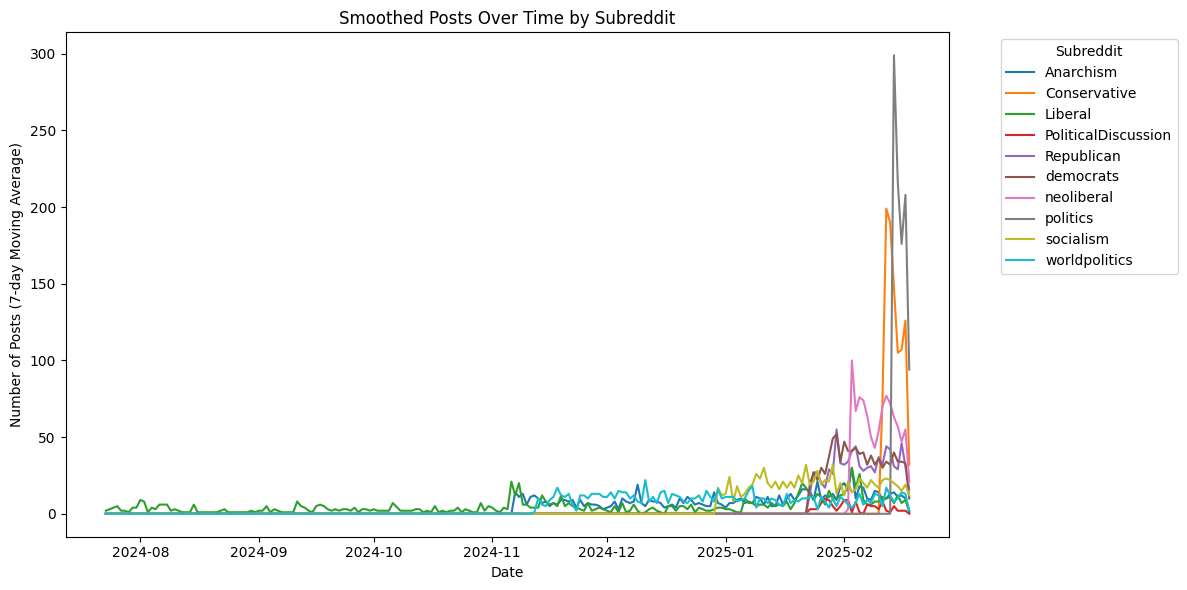

In [55]:
import matplotlib.pyplot as plt

# Group by date and subreddit, then count posts per day for each subreddit
daily_counts = df.groupby([df['created_utc_date'].dt.date, 'subreddit']).size().unstack(fill_value=0)

# Choose a rolling window size (e.g., 7 days for a week)
rolling_window = 1
smoothed_counts = daily_counts.rolling(window=rolling_window, min_periods=1).mean()

smoothing_factor = 0.05  # Adjust to control smoothness (lower = smoother)
ema_counts = daily_counts.ewm(alpha=smoothing_factor, adjust=False).mean()

# Plot the smoothed data
fig, ax = plt.subplots(figsize=(12, 6))
smoothed_counts.plot(ax=ax, kind='line', marker='')
# ema_counts.plot(ax=ax, kind='line', marker='')

# Set labels and title
ax.set_xlabel("Date")
ax.set_ylabel("Number of Posts (7-day Moving Average)")
ax.set_title("Smoothed Posts Over Time by Subreddit")
ax.legend(title="Subreddit", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [56]:
!pip install plotly

In [57]:
import plotly.express as px
import pandas as pd

# Group by date and subreddit, then count posts per day
daily_counts = df.groupby([df['created_utc_date'].dt.date, 'subreddit']).size().unstack(fill_value=0)

# Apply Exponential Moving Average (EMA)
smoothing_factor = 0.05# Adjust this value for more/less smoothing
ema_counts = daily_counts.ewm(alpha=smoothing_factor, adjust=False).mean()

# Convert data to long format for Plotly
ema_counts_long = ema_counts.reset_index().melt(id_vars='created_utc_date', var_name='Subreddit', value_name='Post Count')

# Create an interactive line plot
fig = px.line(ema_counts_long, 
              x='created_utc_date', 
              y='Post Count', 
              color='Subreddit', 
              labels={'created_utc_date': "Date", 'Post Count': "EMA Smoothed Post Count"},
              template="plotly_dark")  # Change to 'plotly_white' for light mode

# Improve interactivity
fig.update_layout(
    hovermode="closest",  # Shows all subreddit values on hover at a given date
    legend_title="Subreddit",
    xaxis_title="Date",
    yaxis_title="EMA Smoothed Post Count",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
)

fig.show(renderer='iframe')


In [58]:
fig.write_html("posts_overtime.html")

In [59]:
import plotly.express as px
import pandas as pd

# Group by date and subreddit, then count posts per day
daily_counts = df.groupby([df['created_utc_date'].dt.date, 'subreddit']).size().unstack(fill_value=0)

# Apply Exponential Moving Average (EMA)
# smoothing_factor = 0.05  # Adjust for more/less smoothing
# ema_counts = daily_counts.ewm(alpha=smoothing_factor, adjust=False).mean()
rolling_window = 15
ema_counts = daily_counts.rolling(window=rolling_window, min_periods=1).mean()
# Calculate percentage change
pct_change = daily_counts.pct_change().fillna(0) * 100  # Convert to percentage

# Convert data to long format for Plotly
merged_df = ema_counts.reset_index().melt(id_vars='created_utc_date', var_name='Subreddit', value_name='EMA Smoothed Count')
merged_df['Original Count'] = daily_counts.reset_index().melt(id_vars='created_utc_date', var_name='Subreddit', value_name='Original Count')['Original Count']
merged_df['Percentage Change'] = pct_change.reset_index().melt(id_vars='created_utc_date', var_name='Subreddit', value_name='Percentage Change')['Percentage Change']

# Format percentage change for better readability
merged_df['Percentage Change'] = merged_df['Percentage Change'].apply(lambda x: f"{x:.2f}%" if x != 0 else "No Change")

# Create an interactive line plot
fig = px.line(
    merged_df, 
    x='created_utc_date', 
    y='EMA Smoothed Count', 
    color='Subreddit', 
    labels={'created_utc_date': "Date", 'EMA Smoothed Count': "Avg Count"},
    template="plotly_dark"  # Change to 'plotly_white' for light mode
)

# Update hover info to include original counts and percentage change
fig.update_traces(
    hovertemplate="<b>Date:</b> %{x}<br>"
                  "<b>Subreddit:</b> %{customdata[0]}<br>"
                  "<b>Original Count:</b> %{customdata[1]}<br>"
                  "<b>Smoothed Count:</b> %{y:.2f}<br>"
                  "<b>Change from Previous Day:</b> %{customdata[2]}"
)

# Attach custom hover data
fig.update_traces(customdata=merged_df[['Subreddit', 'Original Count', 'Percentage Change']].values)

# Update interactivity settings
fig.update_layout(
    hovermode="closest",  # Show only the hovered subreddit
    legend_title="Subreddit",
    xaxis_title="Date",
    yaxis_title="Avg Count",
    legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
)

fig.show(renderer='iframe')


In [60]:
fig.write_html("posts_overtime.html")

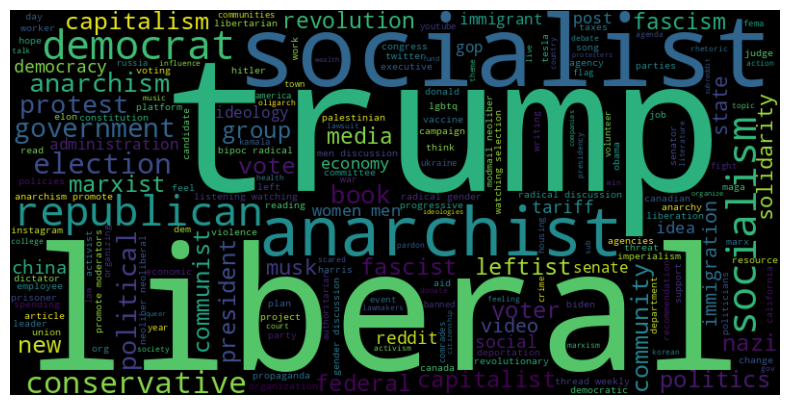

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# text = " ".join(df["clean_selftext"].dropna())
# wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
text = ""
for _, row in df.iterrows():
    raw_topics = eval(row["keywords_selftext"])  # Assuming this contains extracted keywords as a list

    #filter the keywords_title to contain only topics
    topics =[]
    for e in raw_topics:
        topics.append(e[0])
    # Ensure topics are stored as sets
    text += " ".join(topic for topic in topics if topic != "")

wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [62]:
domain_counts = df["domain"].value_counts()

# Keep top N domains, group the rest into "Other"
top_n = 30  
threshold = domain_counts.head(top_n).min()  # Smallest count in the top N

main_domains = domain_counts[domain_counts >= threshold]
other_count = domain_counts[domain_counts < threshold].sum()

# Combine into a new series
domain_clean = pd.concat([main_domains, pd.Series({"Other": other_count})])

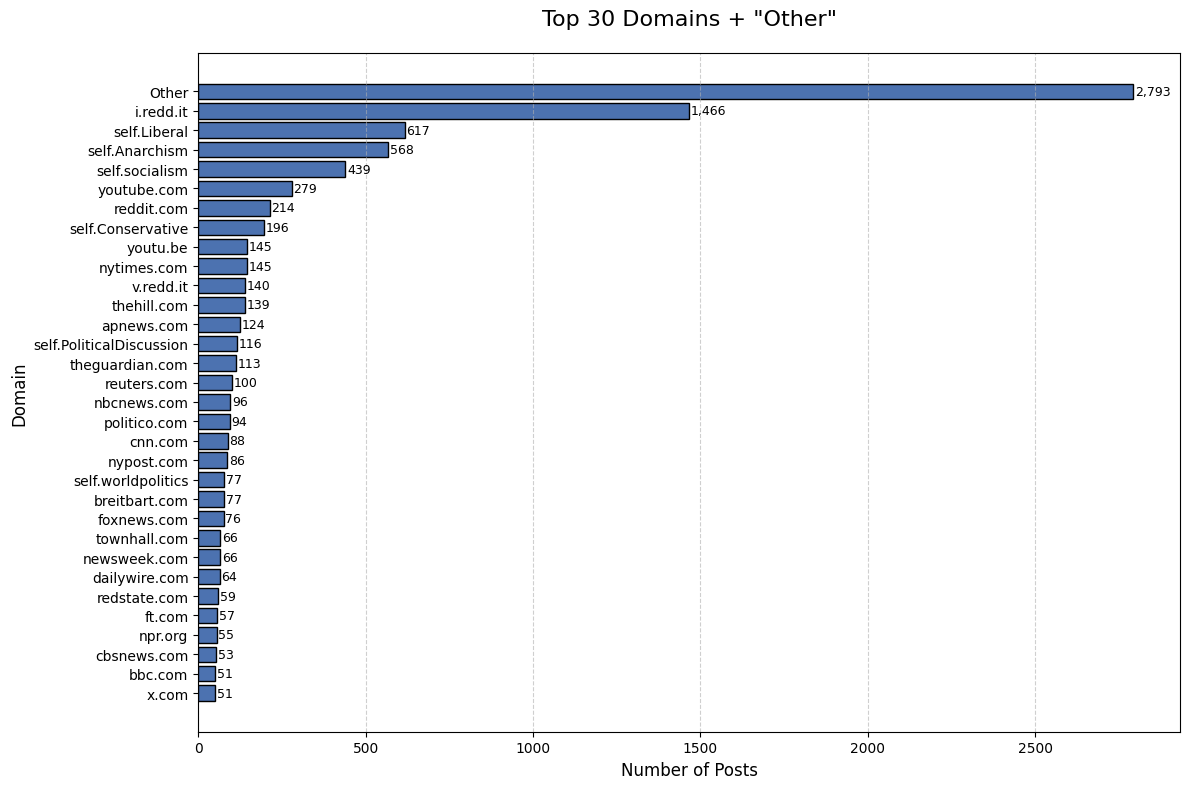

In [63]:
import matplotlib.pyplot as plt

# Sort domains by frequency
domain_clean = domain_clean.sort_values()

# Plot
plt.figure(figsize=(12, 8))
bars = plt.barh(domain_clean.index, domain_clean.values, color='#4C72B0', edgecolor='black')

# Add labels/titles
plt.title(f'Top {top_n} Domains + "Other"', fontsize=16, pad=20)
plt.xlabel('Number of Posts', fontsize=12)
plt.ylabel('Domain', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Add value labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, f'{width:,}', 
             va='center', fontsize=9)

plt.tight_layout()
plt.show()

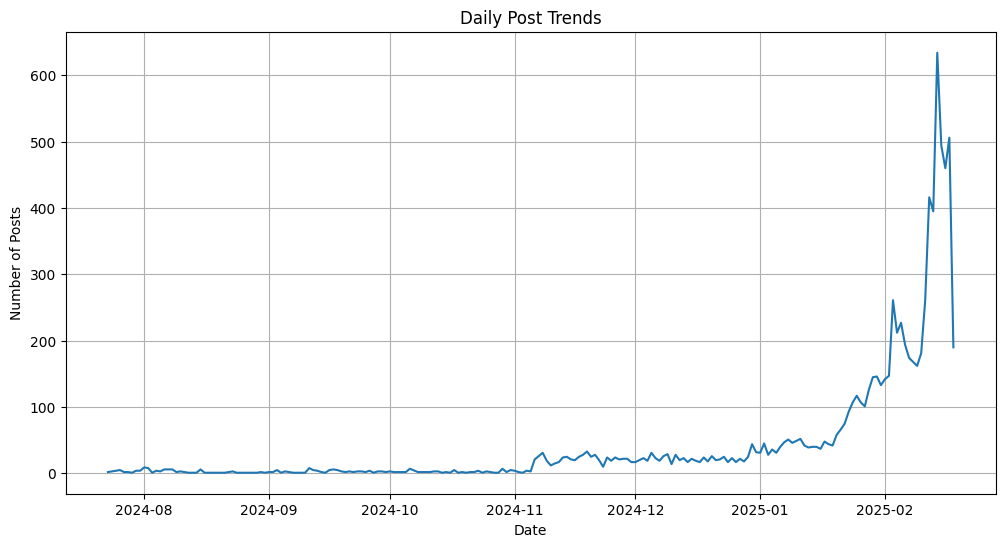

In [64]:
df["created_utc_date"] = pd.to_datetime(df["created_utc"], unit="s")


# Aggregate daily post count
daily_trends = df.groupby(df["created_utc_date"].dt.date).size()

# Plot trends
plt.figure(figsize=(12, 6))
daily_trends.plot(kind="line", marker="", title="Daily Post Trends")
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.grid()
plt.show()

In [65]:
print(df["created_utc_date"].min(), df["created_utc_date"].max())

2024-07-23 20:39:04 2025-02-18 11:45:33


In [66]:
import pandas as pd
import plotly.express as px

# Assuming df contains columns: ['created_utc_date', 'subreddit', 'subreddit_subscribers']

# 1. Convert the created_utc_date column to datetime
df['created_utc_date'] = pd.to_datetime(df['created_utc_date'])

# 2. Group by date (using only the date part) and subreddit
df_grouped = df.groupby([df['created_utc_date'].dt.date, 'subreddit']).agg(
    total_posts=('subreddit', 'size'),           # Count the number of posts per day per subreddit
    subscribers=('subreddit_subscribers', 'max')   # Use the max subscribers of that day as the subscriber count
).reset_index()

# 3. Calculate the engagement rate (posts per subscriber)
df_grouped['engagement_rate'] = df_grouped['total_posts'] / df_grouped['subscribers']
df_grouped['engagement_rate'].fillna(0, inplace=True)  # Replace NaN with 0 if any

# 4. Create an interactive line plot of the engagement rate over time
fig = px.line(
    df_grouped, 
    x='created_utc_date', 
    y='engagement_rate', 
    color='subreddit', 
    title="Engagement Rate of Posts Over Time",
    labels={
        'created_utc_date': 'Date',
        'engagement_rate': 'Engagement Rate (Posts per Subscriber)'
    },
    template="plotly_dark"  # Use "plotly_white" for a light theme if desired
)

fig.update_layout(hovermode="closest")  # Optional: show a unified hover label for the date

fig.show(renderer='iframe')


<ipython-input-66-23860ba534c4>:17: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





### Topic Modelling

In [67]:
df["clean_selftext"]= df["clean_selftext"].fillna("")
df["clean_title"] = df["clean_title"].fillna("")

In [68]:
# df['tokens'] = df.apply(lambda row: row['clean_title'].split() + row['clean_selftext'].split(), axis=1)
df['tokens'] = df.apply(lambda row: row['clean_selftext'].split(), axis=1)

In [69]:
df['tokens'].head()

0    [reading, watching, listening, far, gotten, ch...
1                                                   []
2    [anarcho-nihilist, reading, similar, type, boo...
3    [ayo, m, anarchist, read, working, live, abroa...
4    [looking, videos, podcasts, writing, folks, an...
Name: tokens, dtype: object

In [70]:
import gensim
import gensim.corpora as corpora

# Create a dictionary representation of the document, creates the BoW for all the tokens
dictionary = corpora.Dictionary(df['tokens'])

# Filter extremes to remove very rare or very common words (optional but useful)
dictionary.filter_extremes(no_below=5, no_above=0.5)

#dictionary.doc2bow(text) gives a tuple: (word_id, freq). So, For each post (document), doc2bow() creates a list of (word_id, count) pairs
corpus = [dictionary.doc2bow(text) for text in df['tokens']]


In [71]:
from gensim.models import LdaModel

num_topics = 10  
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, random_state=42, passes=20)
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}")

Topic 0: 0.019*"like" + 0.015*"know" + 0.011*"people" + 0.010*"want" + 0.009*"feel" + 0.008*"socialist" + 0.008*"think" + 0.007*"good" + 0.007*"time" + 0.006*"anarchist"
Topic 1: 0.025*"women" + 0.022*"democrats" + 0.019*"canada" + 0.018*"senate" + 0.017*"trump" + 0.017*"tariffs" + 0.016*"gop" + 0.014*"news" + 0.011*"elon" + 0.009*"men"
Topic 2: 0.020*"people" + 0.012*"like" + 0.009*"trump" + 0.007*"time" + 0.006*"think" + 0.006*"right" + 0.005*"going" + 0.005*"need" + 0.005*"years" + 0.005*"know"
Topic 3: 0.028*"—" + 0.008*"world" + 0.007*"social" + 0.006*"media" + 0.006*"human" + 0.005*"people" + 0.005*"ai" + 0.004*"actions" + 0.004*"free" + 0.004*"average"
Topic 4: 0.018*"said" + 0.016*"u.s" + 0.008*"—" + 0.008*"department" + 0.007*"plan" + 0.007*"trump" + 0.007*"city" + 0.007*"cuts" + 0.007*"programs" + 0.007*"food"
Topic 5: 0.066*"#" + 0.032*"events" + 0.030*"radical" + 0.025*"discussion" + 0.024*"liberals" + 0.024*"new" + 0.020*"happy" + 0.019*"post" + 0.018*"people" + 0.018*"r"


In [72]:
def get_dominant_topic(bow):
    topics = lda_model.get_document_topics(bow) #Return topic distribution for the given document bow, as a list of (topic_id, topic_probability)
    if topics:
        # Sort topics by probability and return the topic id with the highest probability
        return sorted(topics, key=lambda x: x[1], reverse=True)[0][0]
    return None

df['dominant_topic'] = [get_dominant_topic(bow) for bow in corpus]

# Group by subreddit and dominant_topic, then count posts
topic_counts = df.groupby(['subreddit', 'dominant_topic']).size().reset_index(name='count')

# For each subreddit, get the top 3 topics
top_topics_per_subreddit = topic_counts.groupby('subreddit').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)
print(top_topics_per_subreddit)


              subreddit  dominant_topic  count
0             Anarchism               0    640
1             Anarchism               2    191
2             Anarchism               5     59
3          Conservative               0    786
4          Conservative               2    131
5          Conservative               7     15
6               Liberal               2    512
7               Liberal               0    384
8               Liberal               7     22
9   PoliticalDiscussion               2     87
10  PoliticalDiscussion               7     10
11  PoliticalDiscussion               0      6
12           Republican               0    696
13           Republican               2     99
14           Republican               7     16
15            democrats               0    931
16            democrats               2      1
17           neoliberal               0    775
18           neoliberal               4     87
19           neoliberal               2     50
20           

<ipython-input-72-803f0189f9bf>:14: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [73]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import math

# Create a mapping dictionary from topic IDs to themes
topic_to_theme = {
    0: "Personal Perspectives on Socialism/Anarchism",
    1: "U.S.-Canada Political Relations & Gender Debates",
    2: "General Public Opinion on Trump/Right-Wing Politics",
    3: "Social Media Impact & AI Ethics",
    4: "U.S. Domestic Policy & Budget Cuts",
    5: "Online Political Group Dynamics",
    6: "States' Rights & Federalism Debates",
    7: "Trump Administration Analysis",
    8: "Public Health & Economic Policy",
    9: "China-Tech Geopolitics & Alternative Platforms"
}

# Map dominant topic to its theme
top_topics_per_subreddit["theme"] = top_topics_per_subreddit["dominant_topic"].map(topic_to_theme)

# Compute percentage for each topic within each subreddit
df_percent = top_topics_per_subreddit.copy()
df_percent['percent'] = df_percent.groupby('subreddit')['count'].transform(lambda x: x / x.sum() * 100)

# Create a normalized stacked bar chart
fig = px.bar(
    df_percent,
    x="subreddit",
    y="percent",
    color="theme",
    # title="Normalized Distribution of Topics Among Posts per Subreddit",
    labels={"percent": "Percentage of Posts", "subreddit": "Subreddit", "theme": "Topic Theme"},
    template="plotly_dark"
)

fig.update_layout(barmode="stack")
fig.show()


In [74]:
fig.write_html("topics_in_posts.html")

In [75]:
df[~df["crosspost_parent"].isna()]

,title,selftext,url,url_overridden_by_dest,permalink,domain,subreddit,subreddit_name_prefixed,subreddit_subscribers,score,...,author,is_gallery,created_utc_date,clean_title,clean_selftext,hashtags,keywords_title,keywords_selftext,tokens,dominant_topic
1,"""WTF is Social Ecology?"" by Usufruct Collective",NaN,https://usufructcollective.wordpress.com/2025/...,https://usufructcollective.wordpress.com/2025/...,/r/Anarchism/comments/1irrceg/wtf_is_social_ec...,usufructcollective.wordpress.com,Anarchism,r/Anarchism,275979,48,...,NewMunicipalAgenda,NaN,2025-02-17 18:47:05,wtf social ecology usufruct collective,,NaN,"[('collective', 0.677), ('social', 0.5619), ('...",[],[],0
5,WE DONT WANT YOUR FUCKING WAR,NaN,https://i.redd.it/khpdv8r28qje1.jpeg,https://i.redd.it/khpdv8r28qje1.jpeg,/r/Anarchism/comments/1irnxvd/we_dont_want_you...,i.redd.it,Anarchism,r/Anarchism,275979,1032,...,Paczilla3,NaN,2025-02-17 16:32:56,nt want fucking war,,NaN,"[('war', 0.6288), ('want', 0.4129), ('nt', 0.3...",[],[],0
7,Counter Protest TERFS in Brisbane QLD 10am 23r...,NaN,https://www.reddit.com/gallery/1ir8x47,https://www.reddit.com/gallery/1ir8x47,/r/Anarchism/comments/1irge0r/counter_protest_...,reddit.com,Anarchism,r/Anarchism,275979,100,...,Intanetwaifuu,NaN,2025-02-17 09:51:49,counter protest terfs brisbane qld 10 23rd feb...,,NaN,"[('protest', 0.5399), ('brisbane', 0.4859), ('...",[],[],0
8,"For Presidents Day, rather than celebrating Ge...",NaN,/r/CrimethInc/comments/1irhy9j/for_presidents_...,/r/CrimethInc/comments/1irhy9j/for_presidents_...,/r/Anarchism/comments/1irhyik/for_presidents_d...,NaN,Anarchism,r/Anarchism,275979,319,...,CrimethInc-Ex-Worker,NaN,2025-02-17 11:40:46,presidents day celebrating george washington i...,,NaN,"[('enslaved', 0.383), ('presidents', 0.3772), ...",[],[],0
10,Punk as an Example of Anarchist Approaches to ...,NaN,/r/CrimethInc/comments/1ir7d17/punk_as_an_exam...,/r/CrimethInc/comments/1ir7d17/punk_as_an_exam...,/r/Anarchism/comments/1ir7d7c/punk_as_an_examp...,NaN,Anarchism,r/Anarchism,275979,47,...,CrimethInc-Ex-Worker,NaN,2025-02-17 00:43:44,punk example anarchist approaches education,,NaN,"[('anarchist', 0.6569), ('punk', 0.5618), ('ed...",[],[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7730,A reminder that PG&amp;E poisoned a whole comm...,NaN,https://i.redd.it/cxthnqafotae1.jpeg,https://i.redd.it/cxthnqafotae1.jpeg,/r/socialism/comments/1ht4u1r/a_reminder_that_...,i.redd.it,socialism,r/socialism,467051,1531,...,Bolinas99,NaN,2025-01-04 03:05:36,reminder pg&amp;e poisoned community contamina...,,NaN,"[('chromium', 0.597), ('groundwater', 0.4679),...",[],[],0
7738,The Liberal Siren Song,NaN,/r/canadaleft/comments/1hst4iu/the_liberal_sir...,/r/canadaleft/comments/1hst4iu/the_liberal_sir...,/r/socialism/comments/1hst54f/the_liberal_sire...,NaN,socialism,r/socialism,467051,2,...,yogthos,NaN,2025-01-03 18:22:54,liberal siren song,,NaN,"[('siren', 0.6762), ('song', 0.4566), ('libera...",[],[],0
7745,An essay series about the role of greenwashing...,NaN,/r/solarpunk/comments/1hs00eo/greenwashing_une...,/r/solarpunk/comments/1hs00eo/greenwashing_une...,/r/socialism/comments/1hs1jld/an_essay_series_...,NaN,socialism,r/socialism,467051,20,...,Here-Together,NaN,2025-01-02 19:07:48,essay series role greenwashing maintaining glo...,,NaN,"[('greenwashing', 0.6175), ('capitalism', 0.48...",[],[],0
7795,Everything wrong with the Political Compass (r...,NaN,https://youtu.be/lOCRDsNH3D0,https://youtu.be/lOCRDsNH3D0,/r/socialism/comments/1hptbo9/everything_wrong...,youtu.be,socialism,r/socialism,467051,30,...,MLPorsche,NaN,2024-12-30 18:07:51,wrong political compass revolutionaryth0 t,,NaN,"[('compass', 0.5218), ('revolutionaryth0', 0.5...",[],[],0


In [76]:
df[~df["crosspost_parent"].isna()]["crosspost_parent"]

1       t3_1irrbvc
5       t3_1irnx25
7       t3_1ir8x47
8       t3_1irhy9j
10      t3_1ir7d17
           ...    
7730    t3_1hstcl5
7738    t3_1hst4iu
7745    t3_1hs00eo
7795    t3_1hpnfx2
7809    t3_1hpd7b0
Name: crosspost_parent, Length: 238, dtype: object

In [77]:
df["id"]

0       1is5wgo
1       1irrceg
2       1ir8tnp
3       1irq9vp
4       1irojku
         ...   
8794    1gq6mvv
8795    1gq6k66
8796    1gq47q0
8797    1gq2vcc
8798    1gpyedr
Name: id, Length: 8799, dtype: object

In [78]:
df[~df["crosspost_parent_list"].isna()]

,title,selftext,url,url_overridden_by_dest,permalink,domain,subreddit,subreddit_name_prefixed,subreddit_subscribers,score,...,author,is_gallery,created_utc_date,clean_title,clean_selftext,hashtags,keywords_title,keywords_selftext,tokens,dominant_topic
1,"""WTF is Social Ecology?"" by Usufruct Collective",NaN,https://usufructcollective.wordpress.com/2025/...,https://usufructcollective.wordpress.com/2025/...,/r/Anarchism/comments/1irrceg/wtf_is_social_ec...,usufructcollective.wordpress.com,Anarchism,r/Anarchism,275979,48,...,NewMunicipalAgenda,NaN,2025-02-17 18:47:05,wtf social ecology usufruct collective,,NaN,"[('collective', 0.677), ('social', 0.5619), ('...",[],[],0
5,WE DONT WANT YOUR FUCKING WAR,NaN,https://i.redd.it/khpdv8r28qje1.jpeg,https://i.redd.it/khpdv8r28qje1.jpeg,/r/Anarchism/comments/1irnxvd/we_dont_want_you...,i.redd.it,Anarchism,r/Anarchism,275979,1032,...,Paczilla3,NaN,2025-02-17 16:32:56,nt want fucking war,,NaN,"[('war', 0.6288), ('want', 0.4129), ('nt', 0.3...",[],[],0
7,Counter Protest TERFS in Brisbane QLD 10am 23r...,NaN,https://www.reddit.com/gallery/1ir8x47,https://www.reddit.com/gallery/1ir8x47,/r/Anarchism/comments/1irge0r/counter_protest_...,reddit.com,Anarchism,r/Anarchism,275979,100,...,Intanetwaifuu,NaN,2025-02-17 09:51:49,counter protest terfs brisbane qld 10 23rd feb...,,NaN,"[('protest', 0.5399), ('brisbane', 0.4859), ('...",[],[],0
8,"For Presidents Day, rather than celebrating Ge...",NaN,/r/CrimethInc/comments/1irhy9j/for_presidents_...,/r/CrimethInc/comments/1irhy9j/for_presidents_...,/r/Anarchism/comments/1irhyik/for_presidents_d...,NaN,Anarchism,r/Anarchism,275979,319,...,CrimethInc-Ex-Worker,NaN,2025-02-17 11:40:46,presidents day celebrating george washington i...,,NaN,"[('enslaved', 0.383), ('presidents', 0.3772), ...",[],[],0
10,Punk as an Example of Anarchist Approaches to ...,NaN,/r/CrimethInc/comments/1ir7d17/punk_as_an_exam...,/r/CrimethInc/comments/1ir7d17/punk_as_an_exam...,/r/Anarchism/comments/1ir7d7c/punk_as_an_examp...,NaN,Anarchism,r/Anarchism,275979,47,...,CrimethInc-Ex-Worker,NaN,2025-02-17 00:43:44,punk example anarchist approaches education,,NaN,"[('anarchist', 0.6569), ('punk', 0.5618), ('ed...",[],[],0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7730,A reminder that PG&amp;E poisoned a whole comm...,NaN,https://i.redd.it/cxthnqafotae1.jpeg,https://i.redd.it/cxthnqafotae1.jpeg,/r/socialism/comments/1ht4u1r/a_reminder_that_...,i.redd.it,socialism,r/socialism,467051,1531,...,Bolinas99,NaN,2025-01-04 03:05:36,reminder pg&amp;e poisoned community contamina...,,NaN,"[('chromium', 0.597), ('groundwater', 0.4679),...",[],[],0
7738,The Liberal Siren Song,NaN,/r/canadaleft/comments/1hst4iu/the_liberal_sir...,/r/canadaleft/comments/1hst4iu/the_liberal_sir...,/r/socialism/comments/1hst54f/the_liberal_sire...,NaN,socialism,r/socialism,467051,2,...,yogthos,NaN,2025-01-03 18:22:54,liberal siren song,,NaN,"[('siren', 0.6762), ('song', 0.4566), ('libera...",[],[],0
7745,An essay series about the role of greenwashing...,NaN,/r/solarpunk/comments/1hs00eo/greenwashing_une...,/r/solarpunk/comments/1hs00eo/greenwashing_une...,/r/socialism/comments/1hs1jld/an_essay_series_...,NaN,socialism,r/socialism,467051,20,...,Here-Together,NaN,2025-01-02 19:07:48,essay series role greenwashing maintaining glo...,,NaN,"[('greenwashing', 0.6175), ('capitalism', 0.48...",[],[],0
7795,Everything wrong with the Political Compass (r...,NaN,https://youtu.be/lOCRDsNH3D0,https://youtu.be/lOCRDsNH3D0,/r/socialism/comments/1hptbo9/everything_wrong...,youtu.be,socialism,r/socialism,467051,30,...,MLPorsche,NaN,2024-12-30 18:07:51,wrong political compass revolutionaryth0 t,,NaN,"[('compass', 0.5218), ('revolutionaryth0', 0.5...",[],[],0


In [79]:
import ast

cp_dict = ast.literal_eval(df["crosspost_parent_list"][1])
print(cp_dict[0].keys())
print(len(cp_dict))

dict_keys(['approved_at_utc', 'subreddit', 'selftext', 'author_fullname', 'saved', 'mod_reason_title', 'gilded', 'clicked', 'title', 'link_flair_richtext', 'subreddit_name_prefixed', 'hidden', 'pwls', 'link_flair_css_class', 'downs', 'thumbnail_height', 'top_awarded_type', 'hide_score', 'name', 'quarantine', 'link_flair_text_color', 'upvote_ratio', 'author_flair_background_color', 'subreddit_type', 'ups', 'total_awards_received', 'media_embed', 'thumbnail_width', 'author_flair_template_id', 'is_original_content', 'user_reports', 'secure_media', 'is_reddit_media_domain', 'is_meta', 'category', 'secure_media_embed', 'link_flair_text', 'can_mod_post', 'score', 'approved_by', 'is_created_from_ads_ui', 'author_premium', 'thumbnail', 'edited', 'author_flair_css_class', 'author_flair_richtext', 'gildings', 'post_hint', 'content_categories', 'is_self', 'mod_note', 'created', 'link_flair_type', 'wls', 'removed_by_category', 'banned_by', 'author_flair_type', 'domain', 'allow_live_comments', 'sel

In [80]:
cp_dict[0]["subreddit"]

'Communalists'

In [81]:
!pip install pyvis

In [82]:
import networkx as nx
import ast
import matplotlib.pyplot as plt
from pyvis.network import Network
G = nx.DiGraph()

# Iterate over the DataFrame rows
for idx, row in df.iterrows():
    post_id = row["id"]
    subreddit = row["subreddit"]
    
    # Add the post node with subreddit attribute
    G.add_node(post_id, title=row["title"], subreddit=subreddit)

    # Check crosspost_parent: if available, add an edge from parent to current post
    if pd.notna(row["crosspost_parent"]):
        parent_id = row["crosspost_parent"]
        if not G.has_node(parent_id):
            G.add_node(parent_id, subreddit="Unknown")  # Default if parent isn't in dataset
        G.add_edge(parent_id, post_id)

    # Process crosspost_parent_list (convert from string to actual Python list of dictionaries)
    if pd.notna(row["crosspost_parent_list"]):
        try:
            parent_list = ast.literal_eval(row["crosspost_parent_list"]) if isinstance(row["crosspost_parent_list"], str) else row["crosspost_parent_list"]
        except Exception as e:
            parent_list = []
        
        for parent in parent_list:
            parent_id = parent.get("id")
            parent_subreddit = parent.get("subreddit", "Unknown")  # Extract subreddit
            
            if parent_id:
                if not G.has_node(parent_id):
                    G.add_node(parent_id, subreddit=parent_subreddit)
                G.add_edge(parent_id, post_id)

# Now, G contains nodes with subreddit attributes

# Convert NetworkX graph to PyVis
net = Network(height="800px", width="100%", directed=True, notebook=True,cdn_resources="in_line")

net.from_nx(G, default_node_size=10)
# # Add nodes with subreddit as title
# for node, data in G.nodes(data=True):
#     title = data.get("title", "Unknown Post")
#     subreddit = data.get("subreddit", "Unknown")
    
#     net.add_node(node, label=subreddit, title=title, color="lightblue" if subreddit != "Unknown" else "gray")

# # Add edges
# for source, target in G.edges():
#     net.add_edge(source, target, color="gray")

# Show the network graph
net.show("crosspost_network.html")



crosspost_network.html


In [83]:
eval(df["keywords_selftext"][0])

[('reading', 0.525),
 ('listening', 0.5213),
 ('watching', 0.4443),
 ('selection', 0.4129),
 ('chosen', 0.3842)]

In [84]:
import networkx as nx
import random
from pyvis.network import Network
from collections import defaultdict
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Step 1: Extract subreddit topics from the dataset
subreddit_topics = defaultdict(set)

for _, row in df.iterrows():
    subreddit = row["subreddit"]
    raw_topics = eval(row["keywords_selftext"])  # Assuming this contains extracted keywords as a list

    #filter the keywords_title to contain only topics
    topics =[]
    for e in raw_topics:
        topics.append(e[0])
    # Ensure topics are stored as sets
    subreddit_topics[subreddit].update(topics)

# Step 2: Create a Graph (Nodes: Subreddits, Edges: Shared Topics)
G = nx.Graph()

# Add subreddit nodes
for subreddit in subreddit_topics.keys():
    G.add_node(subreddit)

# Add edges based on shared topics
for sub1, topics1 in subreddit_topics.items():
    for sub2, topics2 in subreddit_topics.items():
        if sub1 != sub2:
            shared_topics = topics1.intersection(topics2)
            if shared_topics:
                shared_topics_list = list(shared_topics)[:5]  # Convert set to list before slicing
                G.add_edge(sub1, sub2, weight=len(shared_topics), shared_topics=", ".join(shared_topics_list))
                # G.add_edge(sub1, sub2, weight=len(shared_topics), shared_topics=", ".join(shared_topics[:5]))

# Step 3: Convert NetworkX Graph to PyVis
net = Network(height="800px", width="100%", notebook=True, directed=False,  bgcolor='#222222', font_color="white")

# Generate unique colors for each subreddit
color_map = list(mcolors.TABLEAU_COLORS.values())  # Get a set of distinct colors
node_colors = {sub: random.choice(color_map) for sub in subreddit_topics.keys()}

# Add nodes with color and hover info
for node in G.nodes():
    net.add_node(
        node,
        label=node,
        title=f"Subreddit: {node}\nTopics: {', '.join(list(subreddit_topics[node])[:10])}",
        color=node_colors[node]
    )

# Add edges with hover info
for source, target, data in G.edges(data=True):
    net.add_edge(
        source, 
        target, 
        title=f"Shared Topics: {data['shared_topics']}",
        value=data["weight"],
    )

# Improve layout to avoid clutter
net.barnes_hut(gravity=-5000, central_gravity=0.1, spring_length=200, damping=0.3)

# Save and show interactive graph
net.show("narrative_spread.html")

from IPython.core.display import display, HTML
display(HTML("narrative_spread.html"))


narrative_spread.html


In [85]:
net.save_graph("narrative_spread.html")

In [86]:
!pip install vaderSentiment

In [87]:
df["clean_selftext"].fillna(" ", inplace=True)
df["clean_title"].fillna(" ", inplace=True)

<ipython-input-87-431c320bbd56>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-87-431c320bbd56>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

In [88]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    if isinstance(text, str):  # Ensure text is not NaN
        score = analyzer.polarity_scores(text)["compound"]
        return score
    return 0  # Neutral sentiment for missing text

df["sentiment_score"] = df.apply(lambda row: get_sentiment(row["clean_selftext"] + " " + row["clean_title"]), axis=1)


In [89]:
import plotly.express as px

fig = px.histogram(df, x="sentiment_score", nbins=20, 
                   color_discrete_sequence=["lightblue"], template="plotly_dark",
                  labels={"count":"# of posts","sentiment_score":"Sentiment Score"})


fig.update_traces(hovertemplate="<b>Sentiment Score:</b> %{x}<br><b>No of Posts:</b> %{y}")
fig.update_layout(bargap=0.1, xaxis_title="Sentiment Score", yaxis_title="# of posts")
fig.show()


In [90]:
fig.write_html("sentiment_histogram.html")

In [91]:
fig = px.box(df, x="subreddit", y="sentiment_score", points="all",
             title="Sentiment Scores by Subreddit", color="subreddit", template="plotly_dark")

fig.update_traces(hovertemplate="<b>Subreddit:</b> %{x}<br><b>Sentiment Score:</b> %{y}")

fig.update_layout(xaxis_tickangle=0)
fig.show()


In [92]:
import plotly.graph_objects as go
import pandas as pd

df["sentiment_bins"] = pd.cut(df["sentiment_score"], bins=10)  # Bin sentiment scores
heatmap_data = df.groupby(["subreddit", "sentiment_bins"]).size().unstack().fillna(0)

fig = go.Figure(data=go.Heatmap(
    z=heatmap_data.values,
    x=[str(bin) for bin in heatmap_data.columns],  # Convert bin ranges to strings
    y=heatmap_data.index,
    colorscale="blues",
    hovertemplate="<b>Subreddit:</b> %{y}<br><b>Sentiment Bin:</b> %{x}<br><b>Count:</b> %{z}",
    
))
# title="Heatmap of Sentiment Score Distribution by Subreddit",
fig.update_layout(xaxis_title="Sentiment Score Range", yaxis_title="Subreddit",template="plotly_dark")

fig.show()


<ipython-input-92-4c4d6c1c12ad>:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [93]:
fig.write_html("sentiment_heatmap.html")

In [94]:
import plotly.express as px
import pandas as pd

# Convert `created_utc_date` to datetime (if not already)
df["created_utc_date"] = pd.to_datetime(df["created_utc_date"])

df["sentiment_label"] = df.apply(lambda row: "negative" if row["sentiment_score"]<0 else "positive", axis=1)
# Group by date and sentiment polarity
sentiment_trends = df.groupby([df["created_utc_date"].dt.date, "sentiment_label"]).size().reset_index(name="count")

# Create Line Chart
# Create Line Chart
fig = px.line(sentiment_trends, x="created_utc_date", y="count", color="sentiment_label",
              labels={"created_utc_date": "Date", "count": "Number of Posts", "sentiment_label": "Sentiment"},
              color_discrete_map={"+1 (Positive)": "green", "-1 (Negative)": "red"},
             template="plotly_dark")
fig.update_traces(mode="lines+markers")

# Improve hover info
fig.update_traces(hovertemplate="<b>Date:</b> %{x}<br><b>Sentiment Count:</b> %{y}")

fig.show()


In [95]:
fig.write_html("sentiment_overtime.html")

In [96]:
!pip install pyvis

In [97]:
import plotly.express as px

# List of domains to exclude (Reddit domains and other subreddit links)
excluded_domains = {"reddit.com", "i.redd.it", "v.redd.it", "old.reddit.com", "self.Anarchism", "self.socialism", "self.PoliticalDiscussion", "self.Liberal", "self.Conservative", "self.worldpolitics"}

# Normalize domain names (merge "youtu.be" into "youtube.com")
df["normalized_domain"] = df["domain"].replace({"youtu.be": "youtube.com"})

# Filter out Reddit-related domains
filtered_df = df[~df["normalized_domain"].isin(excluded_domains)]

# Count occurrences of each normalized domain per subreddit
domain_counts = filtered_df.groupby(["normalized_domain", "subreddit"]).size().reset_index(name="count")

# Aggregate the total shares per normalized domain across subreddits
top_domains = domain_counts.groupby("normalized_domain")["count"].sum().reset_index()

# Select the top 10 most shared domains
top_domains = top_domains.nlargest(15, "count")

#title="Top 15 Shared Domains Across Subreddits (Excluding Reddit Links, Merging YouTube)", 
# Create the Pie Chart
fig = px.pie(top_domains, names="normalized_domain", values="count", 
             hole=0.1, color_discrete_sequence=px.colors.qualitative.Set2, template="plotly_dark")

fig.update_traces(textinfo="percent+label", 
                  hovertemplate="<b>Domain:</b> %{label}<br><b>Shared Count:</b> %{value}")

fig.show()


In [98]:
fig.write_html("domains_piechart.html")

In [99]:
# Count occurrences of each normalized domain per subreddit
domain_counts = filtered_df.groupby(["normalized_domain", "subreddit"]).size().reset_index(name="count")

# Aggregate the total shares per normalized domain across subreddits
top_domains = domain_counts.groupby("normalized_domain")["count"].sum().reset_index()

# Select the top 10 most shared domains
top_10_domains = top_domains.nlargest(10, "count")["normalized_domain"]

# Filter only the top 10 domains
filtered_top_df = domain_counts[domain_counts["normalized_domain"].isin(top_10_domains)]
# title="Breakdown of Top 10 Shared Domains Across Subreddits", 
# Create Stacked Bar Chart
fig = px.bar(filtered_top_df, x="normalized_domain", y="count", color="subreddit", 
             labels={"normalized_domain": "Domain", "count": "Share Count", "subreddit": "Subreddit"},
             text="count",
             barmode="stack",
             color_discrete_sequence=px.colors.qualitative.Set2, template="plotly_dark")

fig.update_traces(textposition="outside")

fig.show()

In [100]:
fig.write_html("domain_subreddit.html")